# Analysing and Visualsing WeRate Dogs

In [18]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
matplotlib.style.use('ggplot')

In [28]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 43 columns):
tweet_id                         1994 non-null int64
source_x                         1994 non-null object
text_x                           1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null float64
name                             1994 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null object
entities                         1994 non-null object
extended_entities                1749 non-null object
favorite_count                   1994 non-null int64
favorited                        1994 non-null bool
geo                              0 non-null float64
id                               1994 non-null int64
id_str                           1994 

In [29]:
df.head()

,tweet_id,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,contributors,coordinates,created_at,...,source_y,text_y,truncated,user,jpg_url,dog_stage,prediction_algorithm,confidence_level,source,dog_gender
0,667405339315146752,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,NaN,NaN,2015-11-19 18:13:27,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,Twitter for iPhone,NaN
1,667435689202614272,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,NaN,NaN,2015-11-19 20:14:03,...,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,Twitter for iPhone,NaN
2,667437278097252352,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,NaN,NaN,2015-11-19 20:20:22,...,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,NaN,0.000000,Twitter for iPhone,NaN
3,667443425659232256,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,NaN,NaN,2015-11-19 20:44:47,...,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,NaN,0.000000,Twitter for iPhone,NaN
4,667453023279554560,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,NaN,NaN,2015-11-19 21:22:56,...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,Twitter Web Client,NaN


In [33]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.created_at)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-19 18:13:27 to 2016-06-16 01:25:36
Data columns (total 43 columns):
tweet_id                         1994 non-null object
source_x                         1994 non-null object
text_x                           1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null float64
rating_denominator               1994 non-null float64
name                             1994 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null object
entities                         1994 non-null object
extended_entities                1749 non-null object
favorite_count                   1994 non-null int64
favorited                        1994 non-null bool
geo                              0 non-null float64
id                               1994 non-null int64
i

In [34]:
df.describe()

,rating_numerator,rating_denominator,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted_status,confidence_level
count,1994.000000,1994.000000,0.0,0.0,1994.000000,0.0,1.994000e+03,1.994000e+03,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,1994.0,1994.0,0.0,0.0,0.0,1994.000000,0.0,1994.000000
mean,12.212528,10.510030,NaN,NaN,8858.264293,NaN,7.358508e+17,7.358508e+17,6.978112e+17,6.978112e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,2720.340020,NaN,0.464991
std,41.463532,7.261522,NaN,NaN,12577.702272,NaN,6.747816e+16,6.747816e+16,4.359384e+16,4.359384e+16,0.000000e+00,0.000000e+00,0.0,0.0,NaN,NaN,NaN,4697.005583,NaN,0.339470
min,0.000000,7.000000,NaN,NaN,79.000000,NaN,6.660209e+17,6.660209e+17,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,13.000000,NaN,0.000000
25%,10.000000,10.000000,NaN,NaN,1927.500000,NaN,6.758475e+17,6.758475e+17,6.732411e+17,6.732411e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,608.250000,NaN,0.140466
50%,11.000000,10.000000,NaN,NaN,4048.500000,NaN,7.084748e+17,7.084748e+17,6.757073e+17,6.757073e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,1313.000000,NaN,0.459130
75%,12.000000,10.000000,NaN,NaN,11160.500000,NaN,7.877873e+17,7.877873e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,3126.750000,NaN,0.776387
max,1776.000000,170.000000,NaN,NaN,143519.000000,NaN,8.924206e+17,8.924206e+17,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,NaN,77435.000000,NaN,0.999956


Text(0.5,1,'Correlation Map')

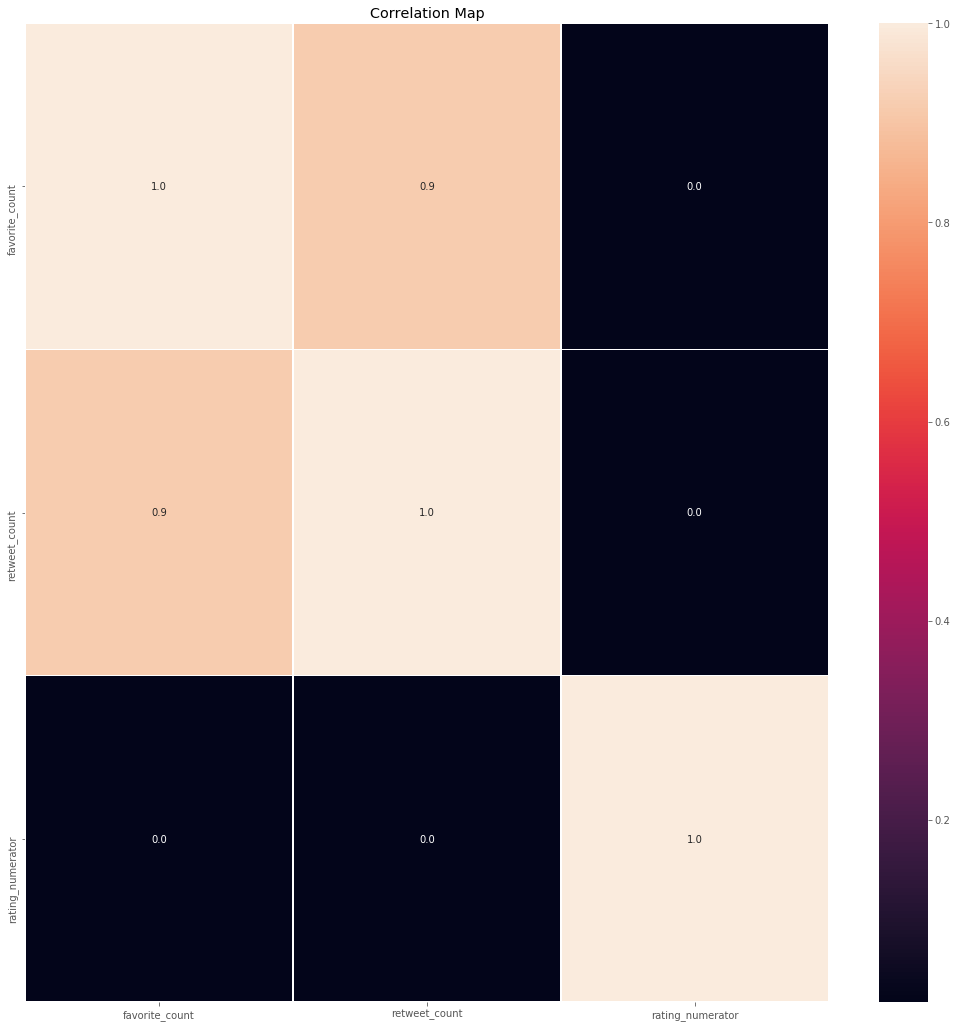

In [37]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[['source', 'favorite_count','retweet_count',
                'rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

We can see that there is high corelation between (faviorate_count & rating_numerator) and also between (retweet_count & rating_numerator)

Text(0.5,1,'Retweets and favorites Scatter plot')

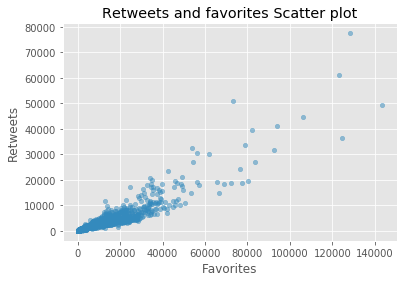

In [38]:


df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')



we noticed that there is a positive correlation between Retweets & Favorites.

Text(0,0.5,'Rating')

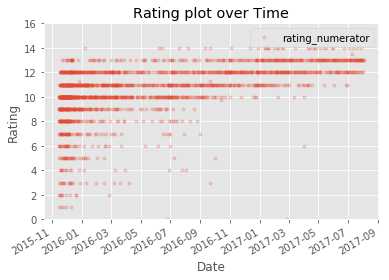

In [39]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

We can see that people are giving rating above 8 over time increases. most of the rating are of 10 to 12

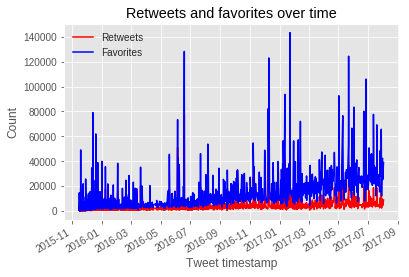

In [40]:
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

By the following plot we conclude that faviorate count is more than number of retweets and both gradually increases over time

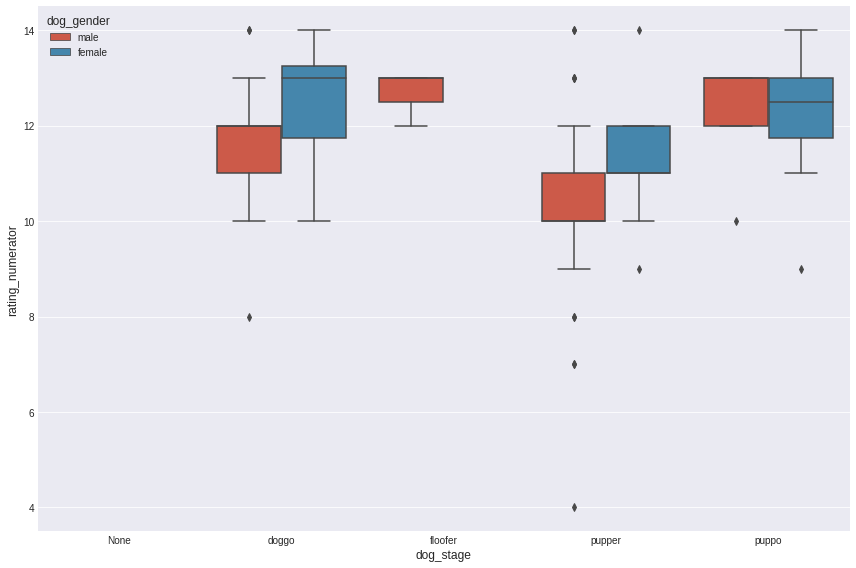

In [41]:
sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=df[df['dog_stage'] != 'None'], 
               size=8,               
               aspect=1.5,   
               legend_out=False)

This is Gender Count of 5 different types of dog stages

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

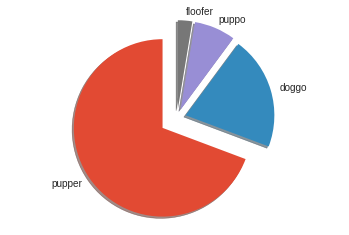

In [42]:
# Plot the data partitioned by dog stage
dog_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

We find that many pictures are of pupper through weRateDogs Twitter account

In [43]:
df[df['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64